In [1]:
# Calcula la cantidad de trbajadores vulnerables al cambio climático

# Importamos librerías
import numpy as np
import pandas as pd
import geopandas as gpd
import geoviews as gv
from scipy import stats

# Parámetros de mapas
gv.extension("matplotlib")
def hook(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.9*b, w, 0.05*h])
options = { "colorbar": True, "linewidth": 0.4,
    "hooks": [hook], "ylim":(-62,85), "xlim":(-180,180),
    "colorbar_opts": {"orientation": "horizontal"} }
options_m = { "bgcolor": "lightgray", "fontscale": 2, "aspect": 2.25 }

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
# Datos

# Códigos nacionales
ix  = "ISO_A3"

# Carpetas
path_r = "../results/"

# Catálogo de datos
path_catalog = "../../Bases_de_datos/Data_catalog.csv"
df_c = pd.read_csv(path_catalog)

# Mapa
borders_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_admin_0_countries_mod" )
borders = gpd.read_file(borders_path).drop(
    columns = [ix] ).set_index("ISO_A3_EH")
borders.index.name = ix
borders = borders[ borders["ISO_N3_EH"] != "-99" ]
borders = borders[ ~borders.index.duplicated() ]

# Océano
ocean_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_ocean" )
ocean = gv.Polygons( gpd.read_file(ocean_path), vdims = "min_zoom"
    ).opts( linewidth = 0, cmap = "Paired")

# Tabla base
iso = "../../Bases_de_datos/Country_ISO_code.csv"
df_iso = pd.read_csv(iso).set_index("alpha-3")
df_iso = df_iso.drop( ["ATA", "ATF", "HMD", "SJM", "SXM", "VAT",
    "BVT", "SGS", "UMI", "ESH", #"TKL",
    "IOT"] )
df_iso.loc[-1] = [ "Kosovo", "XK", "002", np.nan, "Europe", "Southern Europe",
    np.nan, 150, 39, np.nan, np.nan, np.nan, np.nan, np.nan ]
df_iso = df_iso.rename( index = {-1: "XKX"} )
df_iso.index.name = ix

In [3]:
# Índices de vulnerabilidad social y climático
index_n = [ "Social vulnerability index, physical climate impacts",
    "Social vulnerability index, climate transition impacts",
    "Extreme temperature exposure index" ]

df_ph = pd.read_csv("../share/Indexes/Physical_vulnerability_index.csv",
    index_col = ix, usecols = ["Name", ix, index_n[0]] )
df_tr = pd.read_csv("../share/Indexes/Transition_vulnerability_index.csv",
    index_col = ix, usecols = ["Name", ix, index_n[1]] )
df_cl = pd.read_csv("../share/Indexes/Climate_index.csv",
    index_col = ix, usecols = [ix, index_n[2]] )

df_iso[index_n[0]] = df_ph[index_n[0]]
df_iso[index_n[1]] = df_tr[index_n[1]]
df_iso[index_n[2]] = df_cl[index_n[2]]

df = df_iso[ ["name"] + index_n].copy()

df

,name,"Social vulnerability index, physical climate impacts","Social vulnerability index, climate transition impacts",Extreme temperature exposure index
ISO_A3,,,,
AFG,Afghanistan,9.514381,5.966084,6.447368
ALA,Åland Islands,NaN,2.602881,0.000000
ALB,Albania,3.456820,4.664619,3.947368
DZA,Algeria,5.218510,4.391743,6.907895
ASM,American Samoa,NaN,7.209727,0.000000
...,...,...,...,...
WLF,Wallis and Futuna,NaN,5.910360,0.000000
YEM,Yemen,8.988814,6.851024,7.105263
ZMB,Zambia,8.199389,8.270979,6.250000


In [4]:
# Archivo de estadísticas de empleo

# Variables relevantes
id = "EMP_TEMP_SEX_AGE_ECO_NB"
vul_n = [ "Workers in sectors subject to physical climate vulnerability",
    "Workers in sectors subject to transitional climate vulnerability" ]
sectors = [ "Economic activity (Aggregate): Total",
    "Economic activity (Aggregate): Agriculture",
    "Economic activity (Aggregate): Construction",
    "Economic activity (Aggregate): Manufacturing",
    "Economic activity (Aggregate): Mining and quarrying; "
    + "Electricity, gas and water supply" ]
sexes = ["Sex: Total", "Sex: Female"]
ages = [ "Age (10-year bands): Total",
    "Age (10-year bands): 65+",
    "Age (10-year bands): 45-54",
    "Age (10-year bands): 55-64" ]

# Cargamos el archivo
df_0 = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], low_memory = False )
df_0["ref_area.label"] = df_0["ref_area.label"].replace( {
    "Occupied Palestinian Territory": "Palestine, State of",
    "Hong Kong, China": "Hong Kong",
    "Republic of Korea" : "Korea, Republic of",
    "Republic of Moldova": "Moldova, Republic of"
    } )
df_0 = df_0.set_index("ref_area.label")
df_0[ix] = df_iso["name"].reset_index().set_index("name")

# Dataframe para seleccionar año de disponibilidad de datos
countries = df_0.loc[~df_0[ix].duplicated(), [ix]].set_index(ix)
countries["Total_year"] = None
countries["Female_year"] = None
countries["Age_year"] = None

In [5]:
# Escogemos el año para el que hay datos disponibles

# Datos de empleo total y de mujeres.
shape = len(sectors) * len(sexes) * len([ages[0]])
for c in countries.index:
    for y in range(2023, 2013, -1):
        size = df_0.loc[ (df_0["sex.label"].isin(sexes))
            & (df_0["classif1.label"].isin([ages[0]]))
            & (df_0["classif2.label"].isin(sectors))
            & (df_0["time"]==y)
            & (df_0[ix]==c)
            & (df_0["obs_value"].notnull()) ].shape[0]
        if size == shape:
            countries.loc[c, "Female_year"] = y
            break

# Datos de empleo total para los países que no tienen de mujeres.
shape = len(sectors) * len([sexes[0]]) * len([ages[0]])
for c in countries.index:
    for y in range(2023, 2013, -1):
        size = df_0.loc[ (df_0["sex.label"].isin(sexes[0:1]))
            & (df_0["classif1.label"].isin(ages[0:1]))
            & (df_0["classif2.label"].isin(sectors))
            & (df_0["time"]==y)
            & (df_0[ix]==c)
            & (df_0["obs_value"].notnull()) ].shape[0]
        if size == shape:
            countries.loc[c, "Total_year"] = y
            break
countries["Total_year"] = countries["Total_year"].where(
    countries["Female_year"].isnull(), np.nan )

# Datos de empleo por edad.
shape = len(sectors) * len([sexes[0]]) * len(ages)
for c in countries.index:
    for y in range(2023, 2013, -1):
        size = df_0.loc[ (df_0["sex.label"].isin(sexes[0:1]))
            & (df_0["classif1.label"].isin(ages))
            & (df_0["classif2.label"].isin(sectors))
            & (df_0["time"]==y)
            & (df_0[ix]==c)
            & (df_0["obs_value"].notnull()) ].shape[0]
        if size == shape:
            countries.loc[c, "Age_year"] = y
            break
        
countries[countries["Age_year"].notnull()].sort_values("Age_year")

,Total_year,Female_year,Age_year
ISO_A3,,,
CMR,NaN,2021,2014
MAR,NaN,2014,2014
TTO,NaN,2022,2015
ZMB,NaN,2021,2015
MDV,NaN,2019,2016
...,...,...,...
BRA,NaN,2023,2023
RUS,NaN,2023,2023
RWA,NaN,2023,2023


In [6]:
# Obtenemos los trabajadores totales en riesgo
n_series = "total"

# Para cada país seleccionamos el año correspondiente
df_j = []
for row in countries[ countries["Total_year"].notnull() ].itertuples():
    df_j.append( df_0[ (df_0["sex.label"].isin(sexes[0:1]))
        & (df_0["classif1.label"].isin(ages[0:1]))
        & (df_0["classif2.label"].isin(sectors))
        & (df_0[ix]==row.Index)
        & (df_0["time"]==row.Total_year) ] )
df_i = pd.concat(df_j).set_index(ix).sort_index()

# Total de trabajadores
df_tot = df_i.loc[ df_i["classif2.label"
    ].isin(sectors[0:1]), "obs_value" ].copy()

# Calculamos porcentajes por tipo de vulnerabilidad y unimos el dataframe
df_i["% obs_value"] = 100 * df_i["obs_value"] / df_tot
df_j = df_i.loc[df_i["classif2.label"].isin(sectors[1:2])].copy()
df_j[["obs_value", "% obs_value"]] = (
    df_i.loc[ df_i["classif2.label"].isin(sectors[1:2]),
    ["obs_value", "% obs_value"] ]
    + df_i.loc[ df_i["classif2.label"].isin(sectors[2:3]),
    ["obs_value", "% obs_value"] ] )
df_j["classif2.label"] = f"{vul_n[0]}, {n_series}"
df_k = df_i.loc[df_i["classif2.label"].isin(sectors[1:2])].copy()
df_k[["obs_value", "% obs_value"]] = (
    df_i.loc[ df_i["classif2.label"].isin(sectors[3:4]),
    ["obs_value", "% obs_value"] ]
    + df_i.loc[ df_i["classif2.label"].isin(sectors[4:5]),
    ["obs_value", "% obs_value"] ] )
df_k["classif2.label"] = f"{vul_n[1]}, {n_series}"
df_i = pd.concat([df_j, df_k]).sort_index()

# Asignamos los valores obtenidos al dataframe principal
df[f"{vul_n[0]}, {n_series}"  ] = None
df[f"% {vul_n[0]}, {n_series}"] = None
df[f"{vul_n[1]}, {n_series}"  ] = None
df[f"% {vul_n[1]}, {n_series}"] = None
for c in countries[ countries["Total_year"].notnull() ].index:
    df.loc[c, f"{vul_n[0]}, {n_series}"] = ( df_i.loc[ (df_i.index==c)
        & (df_i["classif2.label"]==f"{vul_n[0]}, {n_series}"),
        "obs_value"] ).values[0] * 1000
    df.loc[c, f"% {vul_n[0]}, {n_series}"] = ( df_i.loc[ (df_i.index==c)
        & (df_i["classif2.label"]==f"{vul_n[0]}, {n_series}"),
        "% obs_value"] ).values[0]
    df.loc[c, f"{vul_n[1]}, {n_series}"] = ( df_i.loc[ (df_i.index==c)
        & (df_i["classif2.label"]==f"{vul_n[1]}, {n_series}"),
        "obs_value"] ).values[0] * 1000
    df.loc[c, f"% {vul_n[1]}, {n_series}"] = ( df_i.loc[ (df_i.index==c)
        & (df_i["classif2.label"]==f"{vul_n[1]}, {n_series}"),
        "% obs_value"] ).values[0]

In [7]:
# Obtenemos las trabajadoras en riesgo

# Trabajadores totales
n_series = "total"

# Para cada país seleccionamos el año correspondiente
df_j = []
for row in countries[ countries["Female_year"].notnull() ].itertuples():
    df_j.append( df_0[ (df_0["sex.label"].isin(sexes[0:1]))
        & (df_0["classif1.label"].isin(ages[0:1]))
        & (df_0["classif2.label"].isin(sectors))
        & (df_0[ix]==row.Index)
        & (df_0["time"]==row.Female_year) ] )
df_i = pd.concat(df_j).set_index(ix).sort_index()

# Total de trabajadores
df_tot = df_i.loc[ df_i["classif2.label"
    ].isin(sectors[0:1]), "obs_value"].copy()

# Calculamos porcentajes por tipo de vulnerabilidad y unimos el dataframe
df_i["% obs_value"] = 100 * df_i["obs_value"] / df_tot
df_j = df_i.loc[df_i["classif2.label"].isin(sectors[1:2])].copy()
df_j[["obs_value", "% obs_value"]] = (
    df_i.loc[ df_i["classif2.label"].isin(sectors[1:2]),
    ["obs_value", "% obs_value"] ]
    + df_i.loc[ df_i["classif2.label"].isin(sectors[2:3]),
    ["obs_value", "% obs_value"] ] )
df_j["classif2.label"] = f"{vul_n[0]}, {n_series}"
df_k = df_i.loc[df_i["classif2.label"].isin(sectors[1:2])].copy()
df_k[["obs_value", "% obs_value"]] = (
    df_i.loc[ df_i["classif2.label"].isin(sectors[3:4]),
    ["obs_value", "% obs_value"] ]
    + df_i.loc[ df_i["classif2.label"].isin(sectors[4:5]),
    ["obs_value", "% obs_value"] ] )
df_k["classif2.label"] = f"{vul_n[1]}, {n_series}"
df_i = pd.concat([df_j, df_k]).sort_index()

# Asignamos los valores obtenidos al dataframe principal
for c in countries[ countries["Female_year"].notnull() ].index:
    df.loc[c, f"{vul_n[0]}, {n_series}"] = ( df_i.loc[ (df_i.index==c)
        & (df_i["classif2.label"]==f"{vul_n[0]}, {n_series}"),
        "obs_value"] ).values[0] * 1000
    df.loc[c, f"% {vul_n[0]}, {n_series}"] = ( df_i.loc[ (df_i.index==c)
        & (df_i["classif2.label"]==f"{vul_n[0]}, {n_series}"),
        "% obs_value"] ).values[0]
    df.loc[c, f"{vul_n[1]}, {n_series}"] = ( df_i.loc[ (df_i.index==c)
        & (df_i["classif2.label"]==f"{vul_n[1]}, {n_series}"),
        "obs_value"] ).values[0] * 1000
    df.loc[c, f"% {vul_n[1]}, {n_series}"] = ( df_i.loc[ (df_i.index==c)
        & (df_i["classif2.label"]==f"{vul_n[1]}, {n_series}"),
        "% obs_value"] ).values[0]


# Trabajadoras totales
n_series = "female"

# Para cada país seleccionamos el año correspondiente
df_j = []
for row in countries[ countries["Female_year"].notnull() ].itertuples():
    df_j.append( df_0[ (df_0["sex.label"].isin(sexes[1:2]))
        & (df_0["classif1.label"].isin(ages[0:1]))
        & (df_0["classif2.label"].isin(sectors))
        & (df_0[ix]==row.Index)
        & (df_0["time"]==row.Female_year) ] )
df_i = pd.concat(df_j).set_index(ix).sort_index()

# Total de trabajadores
df_i["% obs_value"] = 100 * df_i["obs_value"] / df_tot

# Calculamos porcentajes por tipo de vulnerabilidad y unimos el dataframe
df_j = df_i.loc[df_i["classif2.label"].isin(sectors[1:2])].copy()
df_j[["obs_value", "% obs_value"]] = (
    df_i.loc[ df_i["classif2.label"].isin(sectors[1:2]),
    ["obs_value", "% obs_value"] ]
    + df_i.loc[ df_i["classif2.label"].isin(sectors[2:3]),
    ["obs_value", "% obs_value"] ] )
df_j["classif2.label"] = f"{vul_n[0]}, {n_series}"
df_k = df_i.loc[df_i["classif2.label"].isin(sectors[1:2])].copy()
df_k[["obs_value", "% obs_value"]] = (
    df_i.loc[ df_i["classif2.label"].isin(sectors[3:4]),
    ["obs_value", "% obs_value"] ]
    + df_i.loc[ df_i["classif2.label"].isin(sectors[4:5]),
    ["obs_value", "% obs_value"] ] )
df_k["classif2.label"] = f"{vul_n[1]}, {n_series}"
df_i = pd.concat([df_j, df_k]).sort_index()

# Asignamos los valores obtenidos al dataframe principal
df[f"{vul_n[0]}, {n_series}"  ] = None
df[f"% {vul_n[0]}, {n_series}"] = None
df[f"{vul_n[1]}, {n_series}"  ] = None
df[f"% {vul_n[1]}, {n_series}"] = None
for c in countries[ countries["Female_year"].notnull() ].index:
    df.loc[c, f"{vul_n[0]}, {n_series}"] = ( df_i.loc[ (df_i.index==c)
        & (df_i["classif2.label"]==f"{vul_n[0]}, {n_series}"),
        "obs_value"] ).values[0] * 1000
    df.loc[c, f"% {vul_n[0]}, {n_series}"] = ( df_i.loc[ (df_i.index==c)
        & (df_i["classif2.label"]==f"{vul_n[0]}, {n_series}"),
        "% obs_value"] ).values[0]
    df.loc[c, f"{vul_n[1]}, {n_series}"] = ( df_i.loc[ (df_i.index==c)
        & (df_i["classif2.label"]==f"{vul_n[1]}, {n_series}"),
        "obs_value"] ).values[0] * 1000
    df.loc[c, f"% {vul_n[1]}, {n_series}"] = ( df_i.loc[ (df_i.index==c)
        & (df_i["classif2.label"]==f"{vul_n[1]}, {n_series}"),
        "% obs_value"] ).values[0]

min: 1.3343808545355655, max: 45.46123079863796


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% Workers in sectors subject to transitional climate vulnerability, total)
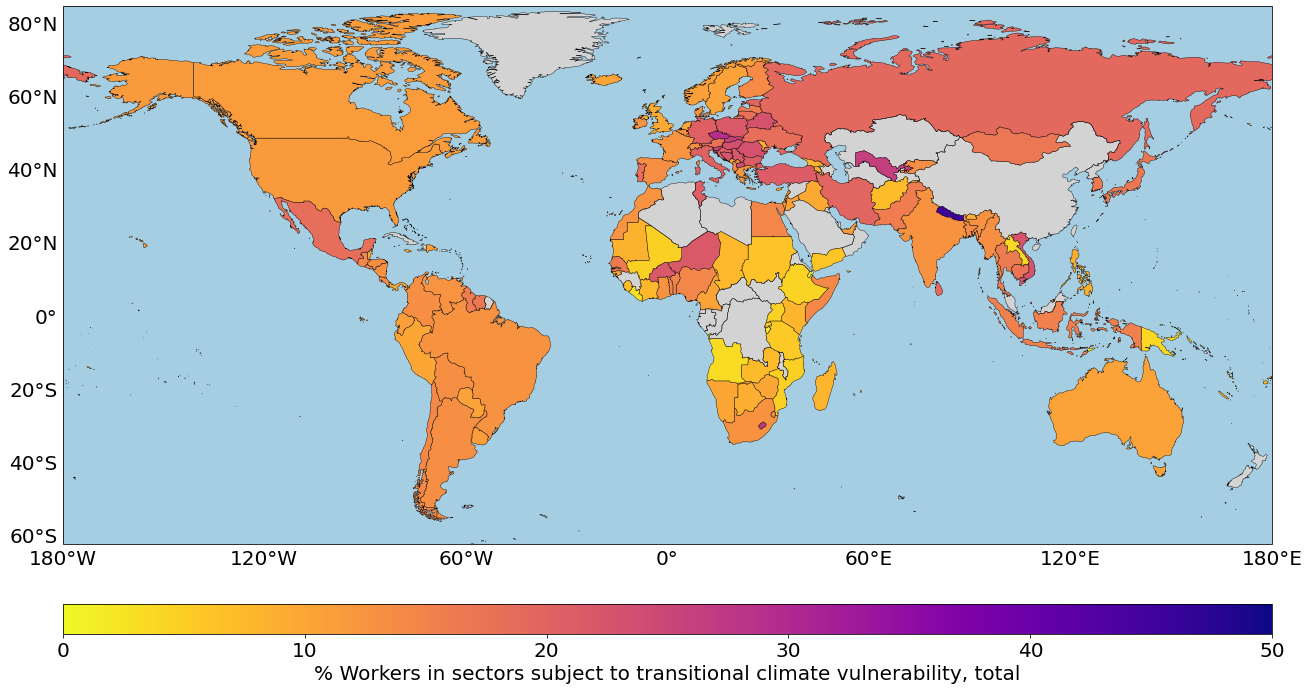

min: 1.673778472263958, max: 86.3594796574654


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% Workers in sectors subject to physical climate vulnerability, total)
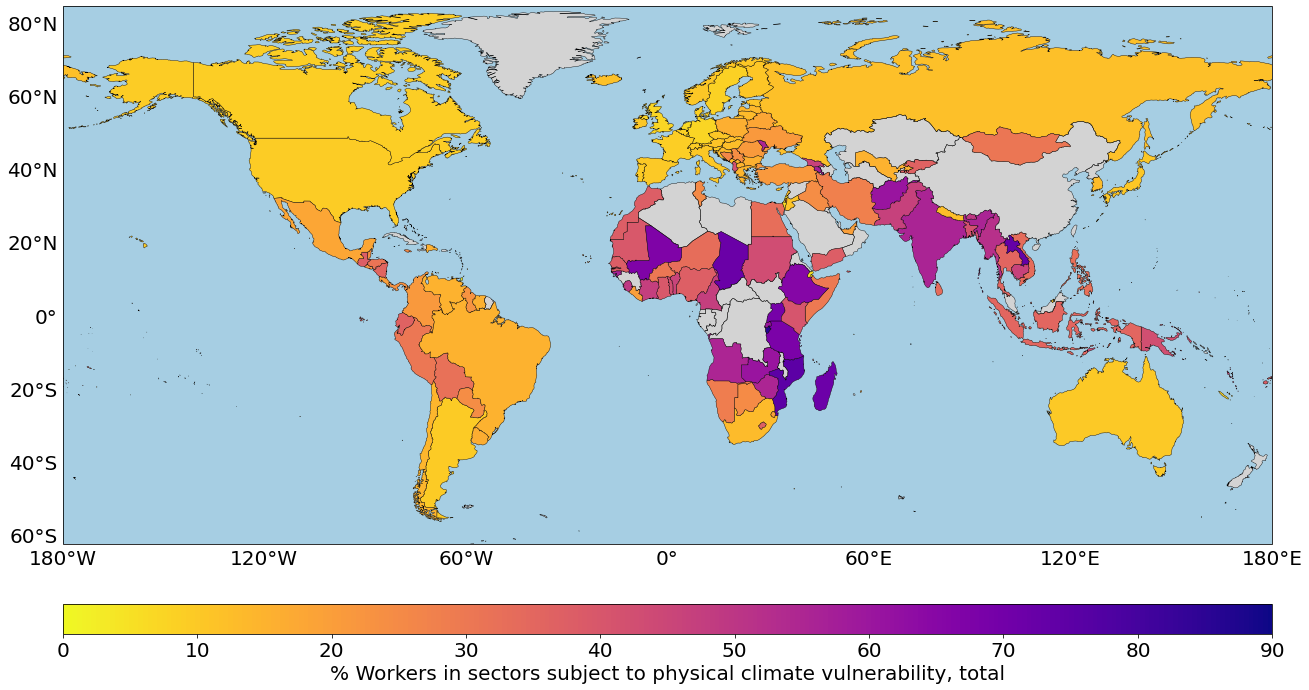

min: 0.29697233964381886, max: 16.10307355269722


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% Workers in sectors subject to transitional climate vulnerability, female)
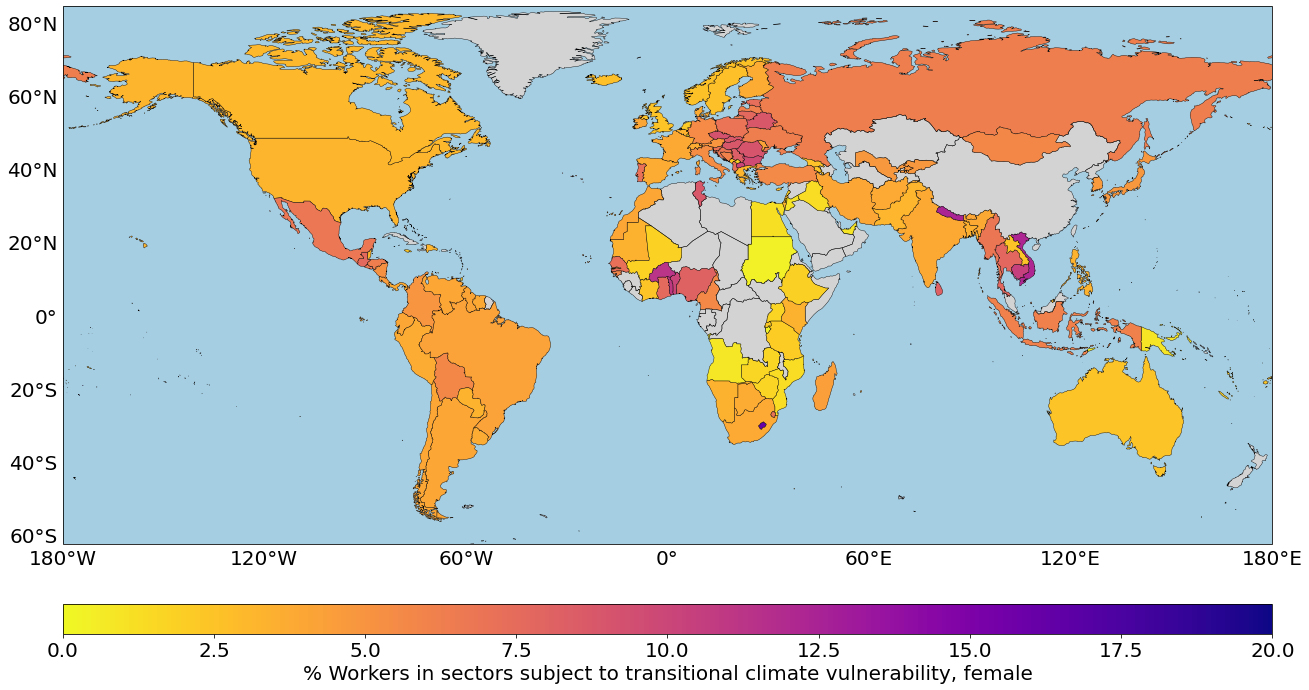

min: 0.18839558961610922, max: 51.14539552573249


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% Workers in sectors subject to physical climate vulnerability, female)
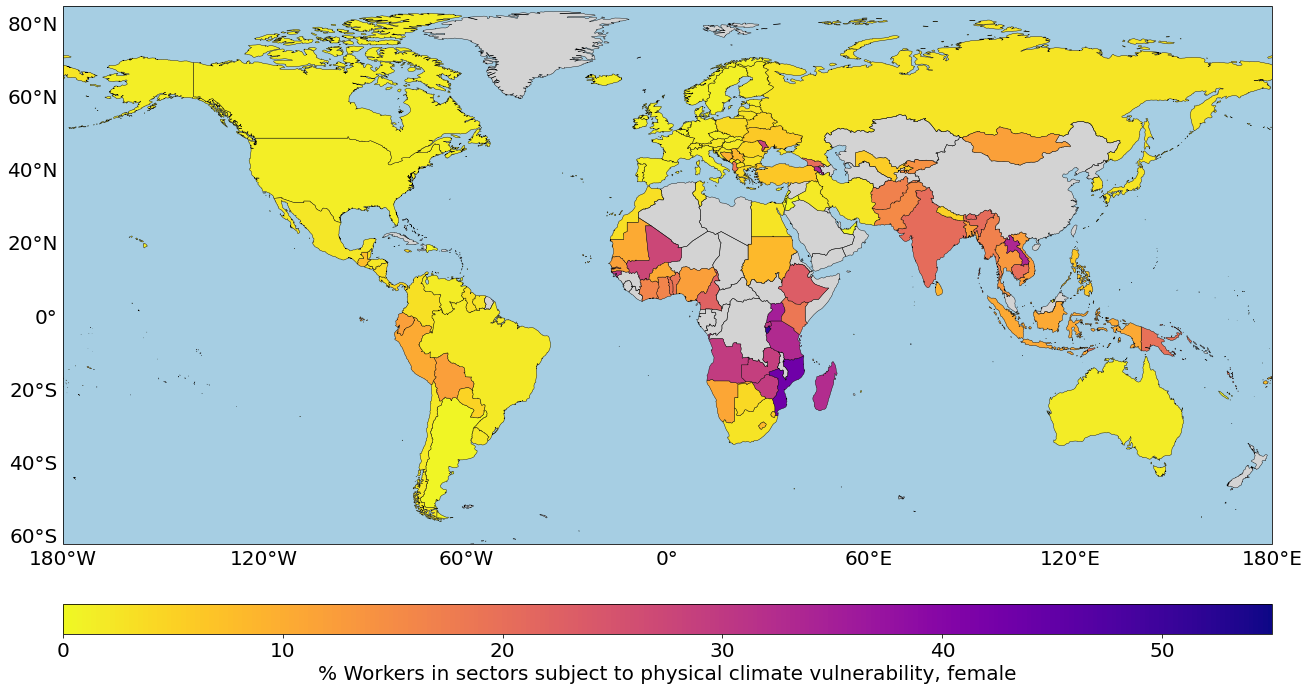

In [8]:
# Mapa
# Total de trabajadores
# vulnerabilidad por transición
n_series = "total"
vn = f"% {vul_n[1]}, {n_series}"
borders[vn] = df[vn]
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 0
max = 50
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Mapa
# vulnerabilidad física
n_series = "total"
vn = f"% {vul_n[0]}, {n_series}"
borders[vn] = df[vn]
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 0
max = 90
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Mapa
# Total de trabajadoras
# vulnerabilidad por transición
n_series = "female"
vn = f"% {vul_n[1]}, {n_series}"
borders[vn] = df[vn]
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 0
max = 20
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Mapa
# vulnerabilidad física
n_series = "female"
vn = f"% {vul_n[0]}, {n_series}"
borders[vn] = df[vn]
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 0
max = 55
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

In [9]:
# 10 países más altos, total de trabajadores, vulnerabilidad por transición
# Ordenado por trabajadores
df[ ["name", f"% {vul_n[1]}, total", index_n[1]] ].sort_values(
    f"% {vul_n[1]}, total", ascending = False ).head(5)

,name,"% Workers in sectors subject to transitional climate vulnerability, total","Social vulnerability index, climate transition impacts"
ISO_A3,,,
NPL,Nepal,45.461231,5.613570
CZE,Czechia,29.123394,1.866427
LSO,Lesotho,27.194543,8.888592
UZB,Uzbekistan,26.26541,4.897620
SVK,Slovakia,26.042549,2.375906


In [10]:
# 10 países más altos, trabajadoras, vulnerabilidad por transición
# Ordenado por trabajadoras
df[ ["name", f"% {vul_n[1]}, total", f"% {vul_n[1]}, female",
    index_n[1]] ].sort_values(
    f"% {vul_n[1]}, female", ascending = False ).head(5)

,name,"% Workers in sectors subject to transitional climate vulnerability, total","% Workers in sectors subject to transitional climate vulnerability, female","Social vulnerability index, climate transition impacts"
ISO_A3,,,,
LSO,Lesotho,27.194543,16.103074,8.888592
TON,Tonga,19.643707,16.088703,4.025686
NPL,Nepal,45.461231,12.349703,5.613570
VNM,Viet Nam,22.700926,12.252059,7.056932
BFA,Burkina Faso,21.780435,11.28634,7.652733


In [11]:
# 10 países más altos, total de trabajadores, vulnerabilidad física
# Ordenado por trabajadores
df[ ["name", f"% {vul_n[0]}, total",
    index_n[0], index_n[2]] ].sort_values(
    f"% {vul_n[0]}, total", ascending = False ).head(5)

,name,"% Workers in sectors subject to physical climate vulnerability, total","Social vulnerability index, physical climate impacts",Extreme temperature exposure index
ISO_A3,,,,
BDI,Burundi,86.35948,9.423808,0.131579
MOZ,Mozambique,75.051726,8.940760,6.184211
LAO,Lao People's Democratic Republic,73.002749,6.745617,6.710526
TCD,Chad,71.879521,10.000000,9.144737
MDG,Madagascar,71.666456,8.019179,4.013158


In [12]:
# 10 países más altos, trabajadoras, vulnerabilidad física
# Ordenado por trabajadoras
df[ ["name", f"% {vul_n[0]}, total", f"% {vul_n[0]}, female",
    index_n[0], index_n[2]] ].sort_values(
    f"% {vul_n[0]}, female", ascending = False ).head(5)

,name,"% Workers in sectors subject to physical climate vulnerability, total","% Workers in sectors subject to physical climate vulnerability, female","Social vulnerability index, physical climate impacts",Extreme temperature exposure index
ISO_A3,,,,,
BDI,Burundi,86.35948,51.145396,9.423808,0.131579
MOZ,Mozambique,75.051726,43.217526,8.940760,6.184211
UGA,Uganda,69.081884,35.150873,9.033390,3.223684
ARM,Armenia,57.242577,33.613807,3.252084,5.131579
LAO,Lao People's Democratic Republic,73.002749,33.511472,6.745617,6.710526


min: 0.10174277416956125, max: 16.373622768139178


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% Workers in sectors subject to physical climate vulnerability, more than 65 years old)
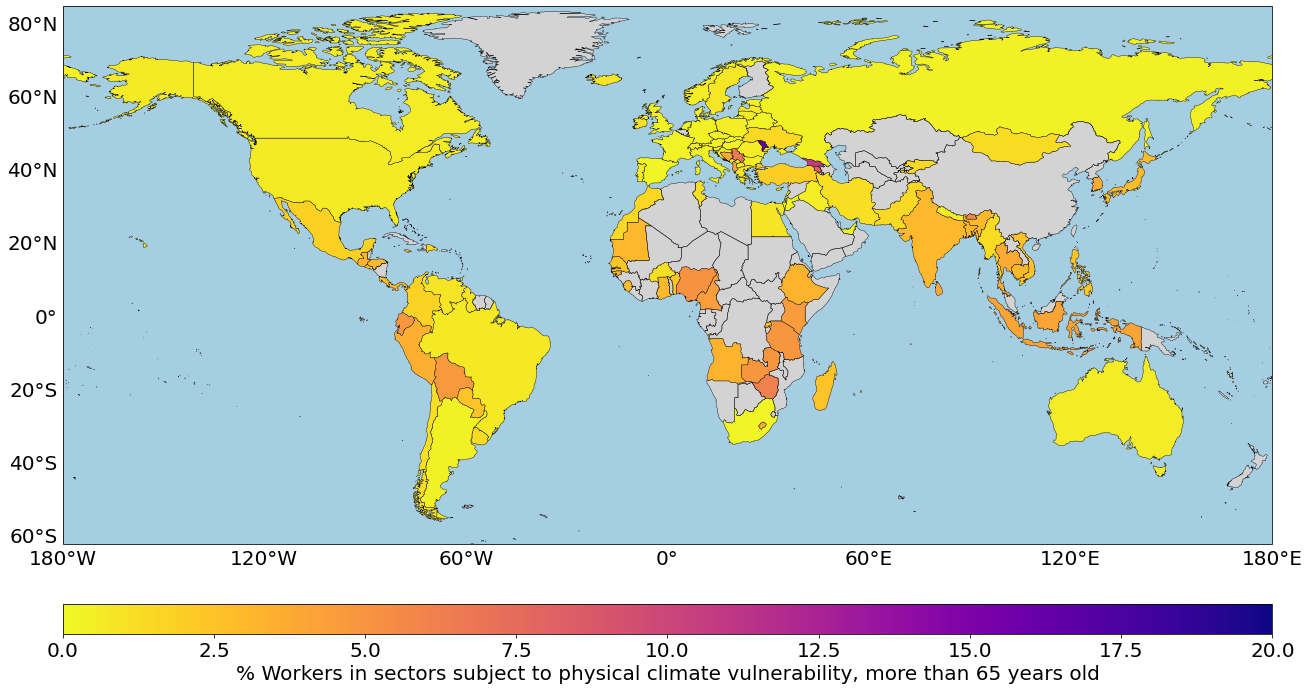

,name,"% Workers in sectors subject to physical climate vulnerability, total","% Workers in sectors subject to physical climate vulnerability, more than 65 years old","Social vulnerability index, physical climate impacts",Extreme temperature exposure index
ISO_A3,,,,,
MDA,"Moldova, Republic of",55.523064,16.373623,4.086872,3.684211
GEO,Georgia,46.109573,10.786018,4.072416,3.815789
ARM,Armenia,57.242577,7.761224,3.252084,5.131579
SRB,Serbia,23.977625,6.595009,4.158272,4.736842
ZWE,Zimbabwe,55.513058,6.237663,8.718394,6.052632
TLS,Timor-Leste,44.116682,6.0211,8.082596,0.000000
BTN,Bhutan,49.477063,5.884055,4.588912,0.000000
NGA,Nigeria,37.589548,5.085484,8.479909,8.750000
TZA,"Tanzania, United Republic of",67.852365,4.910811,8.213269,3.421053


In [13]:
# Obtenemos los trabajadores de +65 años en riesgo
n_series = "more than 65 years old"

# Para cada país seleccionamos el año correspondiente
df_j = []
for row in countries[ countries["Age_year"].notnull() ].itertuples():
    df_j.append( df_0[ (df_0["sex.label"].isin(sexes[0:1]))
        & (df_0["classif1.label"].isin(ages[0:1]))
        & (df_0["classif2.label"].isin(sectors))
        & (df_0[ix]==row.Index)
        & (df_0["time"]==row.Age_year) ] )
df_i = pd.concat(df_j).set_index(ix).sort_index()

# Total de trabajadores
df_tot = df_i.loc[ df_i["classif2.label"
    ].isin(sectors[0:1]), "obs_value"].copy()

# Para cada país seleccionamos el año correspondiente
df_j = []
for row in countries[ countries["Age_year"].notnull() ].itertuples():
    df_j.append( df_0[ (df_0["sex.label"].isin(sexes[0:1]))
        & (df_0["classif1.label"].isin(ages[1:2]))
        & (df_0["classif2.label"].isin(sectors))
        & (df_0[ix]==row.Index)
        & (df_0["time"]==row.Age_year) ] )
df_i = pd.concat(df_j).set_index(ix).sort_index()

# Calculamos porcentajes por tipo de vulnerabilidad y unimos el dataframe
df_i["% obs_value"] = 100 * df_i["obs_value"] / df_tot
df_j = df_i.loc[df_i["classif2.label"].isin(sectors[1:2])].copy()
df_j[["obs_value", "% obs_value"]] = (
    df_i.loc[ df_i["classif2.label"].isin(sectors[1:2]),
    ["obs_value", "% obs_value"] ]
    + df_i.loc[ df_i["classif2.label"].isin(sectors[2:3]),
    ["obs_value", "% obs_value"] ] )
df_j["classif2.label"] = f"{vul_n[0]}, {n_series}"
df_i = pd.concat([df_i, df_j, df_k]).sort_index()

# Asignamos los valores obtenidos al dataframe principal
df[f"{vul_n[0]}, {n_series}"  ] = None
df[f"% {vul_n[0]}, {n_series}"] = None
for c in countries[ countries["Age_year"].notnull() ].index:
    df.loc[c, f"{vul_n[0]}, {n_series}"] = ( df_i.loc[ (df_i.index==c)
        & (df_i["classif2.label"]==f"{vul_n[0]}, {n_series}"),
        "obs_value"] ).values[0] * 1000
    df.loc[c, f"% {vul_n[0]}, {n_series}"] = ( df_i.loc[ (df_i.index==c)
        & (df_i["classif2.label"]==f"{vul_n[0]}, {n_series}"),
        "% obs_value"] ).values[0]

# Mapa
# +65 años, vulnerabilidad física
vn = f"% {vul_n[0]}, {n_series}"
borders[vn] = df[vn]
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 0
max = 20
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# 10 países más altos, +65 años, vulnerabilidad física
df[["name", f"% {vul_n[0]}, total", f"% {vul_n[0]}, {n_series}",
    index_n[0], index_n[2]] ].sort_values(
    f"% {vul_n[0]}, {n_series}", ascending = False ).head(10)

min: 0.48298125276682097, max: 13.648811198064271


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (% Workers in sectors subject to transitional climate vulnerability, more than 45 years old)
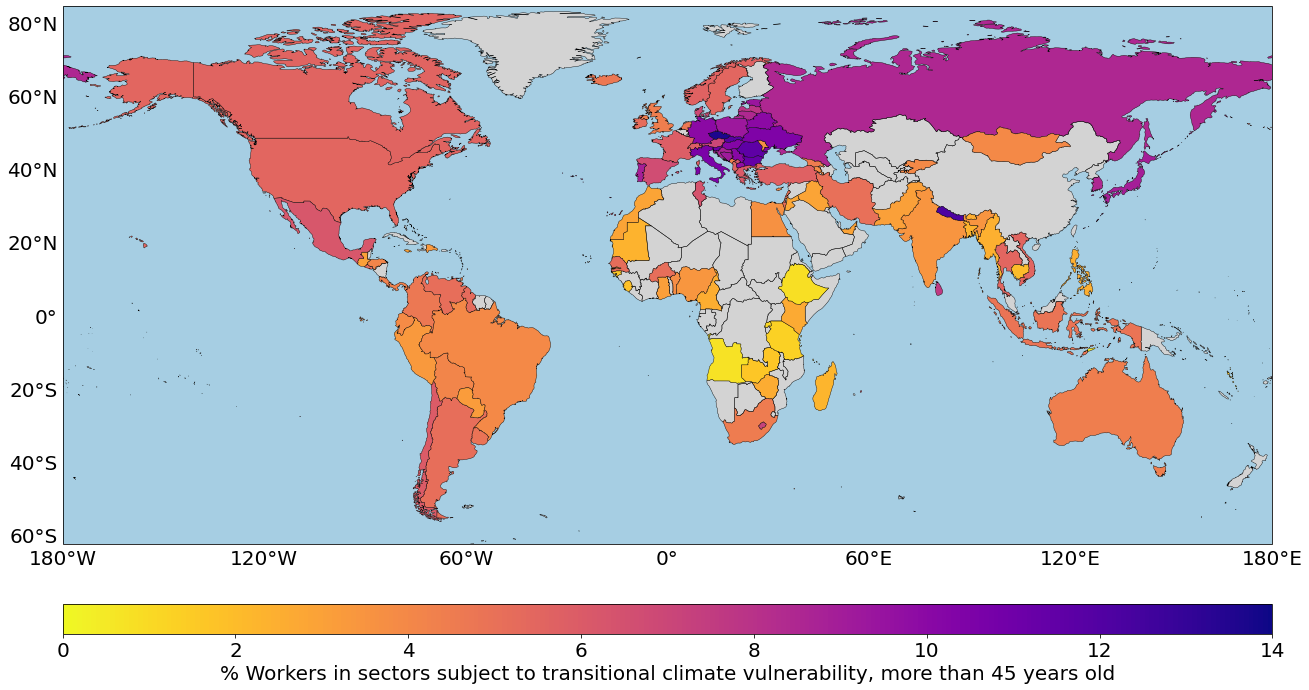

,name,"% Workers in sectors subject to transitional climate vulnerability, more than 45 years old","Social vulnerability index, climate transition impacts"
ISO_A3,,,
CZE,Czechia,13.648811,1.866427
NPL,Nepal,12.150081,5.613570
SVK,Slovakia,11.878229,2.375906
ROU,Romania,11.623519,5.536230
BGR,Bulgaria,11.397671,6.913482
SVN,Slovenia,11.109241,1.278094
ITA,Italy,10.608298,4.596740
UKR,Ukraine,10.391051,5.311008
HUN,Hungary,10.263191,3.900403


In [14]:
# Obtenemos los trabajadores de +45 años en riesgo
n_series = "more than 45 years old"

# Para cada país seleccionamos el año correspondiente
# Seleccionamos por rango de edad y sumamos
# Más de 65 años
df_j = []
for row in countries[ countries["Age_year"].notnull() ].itertuples():
    df_j.append( df_0[ (df_0["sex.label"].isin(sexes[0:1]))
        & (df_0["classif1.label"].isin(ages[1:2]))
        & (df_0["classif2.label"].isin(sectors))
        & (df_0[ix]==row.Index)
        & (df_0["time"]==row.Age_year) ].copy() )
# Más de 45 años
df_k = []
for row in countries[ countries["Age_year"].notnull() ].itertuples():
    df_k.append( df_0[ (df_0["sex.label"].isin(sexes[0:1]))
        & (df_0["classif1.label"].isin(ages[2:3]))
        & (df_0["classif2.label"].isin(sectors))
        & (df_0[ix]==row.Index)
        & (df_0["time"]==row.Age_year) ] )
# Más de 55 años
df_l = []
for row in countries[ countries["Age_year"].notnull() ].itertuples():
    df_l.append( df_0[ (df_0["sex.label"].isin(sexes[0:1]))
        & (df_0["classif1.label"].isin(ages[3:4]))
        & (df_0["classif2.label"].isin(sectors))
        & (df_0[ix]==row.Index)
        & (df_0["time"]==row.Age_year) ] )
for i in range(len(df_j)):
    df_j[i]["obs_value"] = ( df_j[i]["obs_value"].values
        + df_k[i]["obs_value"].values + df_l[i]["obs_value"].values )
    df_j[i]["classif1.label"] = "Age (10-year bands): 45+"
df_i = pd.concat(df_j).set_index(ix).sort_index()

# Total de trabajadores
# Usamos el valor de la celda anterior

# Calculamos porcentajes por tipo de vulnerabilidad y unimos el dataframe
df_i["% obs_value"] = 100 * df_i["obs_value"] / df_tot
df_k = df_i.loc[df_i["classif2.label"].isin(sectors[1:2])].copy()
df_k[["obs_value", "% obs_value"]] = (
    df_i.loc[ df_i["classif2.label"].isin(sectors[3:4]),
    ["obs_value", "% obs_value"] ]
    + df_i.loc[ df_i["classif2.label"].isin(sectors[4:5]),
    ["obs_value", "% obs_value"] ] )
df_k["classif2.label"] = f"{vul_n[1]}, {n_series}"
df_i = pd.concat([df_i, df_k]).sort_index()

# Asignamos los valores obtenidos al dataframe principal
# Asignamos los valores obtenidos al dataframe principal
df[f"{vul_n[1]}, {n_series}"  ] = None
df[f"% {vul_n[1]}, {n_series}"] = None
for c in countries[ countries["Age_year"].notnull() ].index:
    df.loc[c, f"{vul_n[1]}, {n_series}"] = ( df_i.loc[ (df_i.index==c)
        & (df_i["classif2.label"]==f"{vul_n[1]}, {n_series}"),
        "obs_value"] ).values[0] * 1000
    df.loc[c, f"% {vul_n[1]}, {n_series}"] = ( df_i.loc[ (df_i.index==c)
        & (df_i["classif2.label"]==f"{vul_n[1]}, {n_series}"),
        "% obs_value"] ).values[0]

# Mapa
# +45 años, vulnerabilidad física
vn = f"% {vul_n[1]}, {n_series}"
borders[vn] = df[vn]
print(f"min: {borders[vn].min()}, max: {borders[vn].max()}")
min = 0
max = 14
map_v = gv.Polygons( borders, vdims = gv.Dimension(vn, range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# 10 países más altos, +45 años, vulnerabilidad de transición
df[["name", f"% {vul_n[1]}, {n_series}", index_n[1]]].sort_values(
    f"% {vul_n[1]}, {n_series}", ascending = False ).head(10)

In [15]:
# Países con mayor exposición
df[ ["name", f"% {vul_n[0]}, total", f"% {vul_n[0]}, female",
    f"% {vul_n[0]}, more than 65 years old", index_n[0], index_n[2]]
    ].sort_values( index_n[2], ascending = False ).head(15)

,name,"% Workers in sectors subject to physical climate vulnerability, total","% Workers in sectors subject to physical climate vulnerability, female","% Workers in sectors subject to physical climate vulnerability, more than 65 years old","Social vulnerability index, physical climate impacts",Extreme temperature exposure index
ISO_A3,,,,,,
BHR,Bahrain,None,None,None,1.891880,10.000000
KHM,Cambodia,46.254985,20.124471,3.048953,7.048637,9.934211
BFA,Burkina Faso,30.548441,10.406367,1.181494,9.211059,9.868421
SEN,Senegal,37.777688,11.865512,2.317008,7.818466,9.802632
MLI,Mali,66.798344,27.304807,None,9.251340,9.736842
GNB,Guinea-Bissau,56.882961,30.489686,3.419712,8.800590,9.671053
NAM,Namibia,28.704103,11.027491,None,6.102077,9.605263
THA,Thailand,35.852615,13.297081,3.773912,2.673231,9.539474
EGY,Egypt,32.852806,2.650639,0.941566,6.852309,9.473684


In [16]:
# Países con mayor vulnerabilidad física
df[ ["name", f"% {vul_n[0]}, total", f"% {vul_n[0]}, female",
    f"% {vul_n[0]}, more than 65 years old", index_n[0], index_n[2]]
    ].sort_values( index_n[0], ascending = False ).head(15)

,name,"% Workers in sectors subject to physical climate vulnerability, total","% Workers in sectors subject to physical climate vulnerability, female","% Workers in sectors subject to physical climate vulnerability, more than 65 years old","Social vulnerability index, physical climate impacts",Extreme temperature exposure index
ISO_A3,,,,,,
TCD,Chad,71.879521,None,None,10.000000,9.144737
SSD,South Sudan,None,None,None,9.980131,9.078947
NER,Niger,33.136518,None,None,9.862461,9.276316
CAF,Central African Republic,None,None,None,9.653946,8.486842
SOM,Somalia,29.789144,None,None,9.553605,8.618421
AFG,Afghanistan,60.71464,16.835437,None,9.514381,6.447368
BDI,Burundi,86.35948,51.145396,None,9.423808,0.131579
MLI,Mali,66.798344,27.304807,None,9.251340,9.736842
GIN,Guinea,None,None,None,9.235101,8.947368


In [20]:
# Países con mayor vulnerabilidad por transición
df[ ["name", f"% {vul_n[1]}, total", f"% {vul_n[1]}, female",
    f"% {vul_n[1]}, more than 45 years old", index_n[1], index_n[2]]
    ].sort_values( index_n[1], ascending = False ).head(20)

,name,"% Workers in sectors subject to transitional climate vulnerability, total","% Workers in sectors subject to transitional climate vulnerability, female","% Workers in sectors subject to transitional climate vulnerability, more than 45 years old","Social vulnerability index, climate transition impacts",Extreme temperature exposure index
ISO_A3,,,,,,
PNG,Papua New Guinea,3.711221,0.906224,None,10.000000,0.723684
AGO,Angola,3.474576,0.799991,0.762619,9.847009,4.342105
MOZ,Mozambique,4.745308,1.267937,None,9.721220,6.184211
SSD,South Sudan,None,None,None,9.493340,9.078947
NIC,Nicaragua,12.777202,5.192781,None,9.190203,7.828947
LSO,Lesotho,27.194543,16.103074,7.168421,8.888592,0.657895
KHM,Cambodia,17.282664,10.418487,2.010641,8.862320,9.934211
COG,Congo,None,None,None,8.820310,1.644737
MTQ,Martinique,None,None,None,8.813555,0.000000


In [21]:
# Información para un país específico
country = "FJI"

df.loc[country]

name                                                                                               Fiji
Social vulnerability index, physical climate impacts                                           5.594927
Social vulnerability index, climate transition impacts                                         4.334095
Extreme temperature exposure index                                                                  0.0
Workers in sectors subject to physical climate vulnerability, total                            125249.0
% Workers in sectors subject to physical climate vulnerability, total                         38.294834
Workers in sectors subject to transitional climate vulnerability, total                         21207.0
% Workers in sectors subject to transitional climate vulnerability, total                      6.484032
Workers in sectors subject to physical climate vulnerability, female                            24545.0
% Workers in sectors subject to physical climate vulnerability, 